#Importing necessary libearies

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import to_categorical
import numpy as np
import pandas as pd

##Load the dataset

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train.shape


170498071/170498071 [==============================] - 2s 0us/step


(50000, 32, 32, 3)

In [3]:
x_test.shape

(10000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

##Here we see there are 50000 training images and 1000 test images

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
y_train = y_train.reshape(-1)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [8]:
classes[8]

'ship'

In [9]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

##Let's plot some images to see what they are

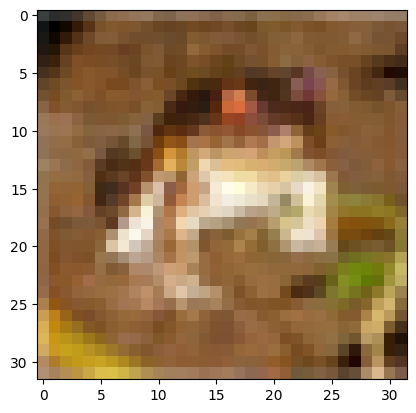

In [10]:
plt.imshow(x_train[0])

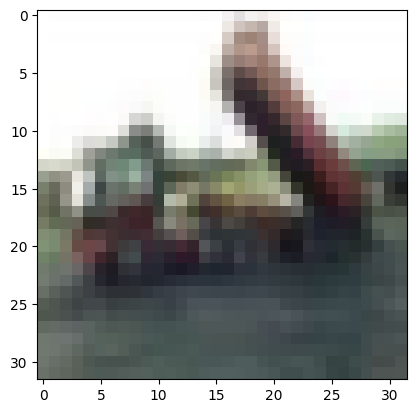

In [11]:
plt.imshow(x_train[2])

In [12]:
def plot_sample(x, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

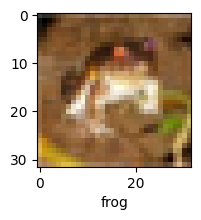

In [13]:
plot_sample(x_train, y_train, 0)

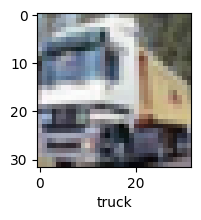

In [14]:
plot_sample(x_train, y_train, 1)

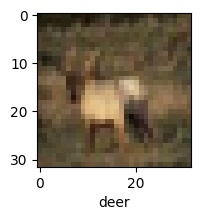

In [15]:
plot_sample(x_train, y_train, 3)

###Normalizing the training data

In [16]:
x_train[0]/255

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

##Normalizing the values

In [17]:
x_train = x_train / 255
x_test = x_test / 255

##Building simple artificial neural network for image classification

In [21]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000,activation='relu'),
        layers.Dense(10, activation= 'sigmoid')
      ])

ann.compile(optimizer= 'SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
ann.fit(x_train, y_train, epochs=5)



Epoch 1/5
1563/1563 [==============================] - 155s 99ms/step - loss: 1.8140 - accuracy: 0.3550
Epoch 2/5
1563/1563 [==============================] - 156s 100ms/step - loss: 1.6256 - accuracy: 0.4252
Epoch 3/5
1563/1563 [==============================] - 158s 101ms/step - loss: 1.5439 - accuracy: 0.4568
Epoch 4/5
1563/1563 [==============================] - 151s 97ms/step - loss: 1.4844 - accuracy: 0.4778
Epoch 5/5
1563/1563 [==============================] - 151s 97ms/step - loss: 1.4352 - accuracy: 0.4947


##You can see that at the end of 5 epochs, accuracy is at around 49%

In [23]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 10s 32ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.51      0.54      0.52      1000
           1       0.69      0.46      0.55      1000
           2       0.48      0.13      0.21      1000
           3       0.40      0.29      0.34      1000
           4       0.43      0.41      0.42      1000
           5       0.57      0.22      0.32      1000
           6       0.40      0.75      0.52      1000
           7       0.58      0.52      0.55      1000
           8       0.43      0.80      0.56      1000
           9       0.48      0.61      0.54      1000

    accuracy                           0.47     10000
   macro avg       0.50      0.47      0.45     10000
weighted avg       0.50      0.47      0.45     10000



##Now let us build a convolutional neural network to train our images

In [26]:
cnn = models.Sequential([
        #cnn
        layers.Conv2D(filters=32, kernel_size=(3,3), activation= 'relu', input_shape=(32,32,3)),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(filters=32, kernel_size=(3,3), activation= 'relu', input_shape=(32,32,3)),
        layers.MaxPooling2D((2,2)),

        #dense

        layers.Flatten(),
        layers.Dense(64,activation='relu'),
        layers.Dense(10, activation= 'softmax')
      ])

In [36]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [37]:
cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 53s 33ms/step - loss: 1.4759 - accuracy: 0.4725
Epoch 2/10
1563/1563 [==============================] - 53s 34ms/step - loss: 1.1500 - accuracy: 0.5967
Epoch 3/10
1563/1563 [==============================] - 52s 33ms/step - loss: 1.0306 - accuracy: 0.6383
Epoch 4/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.9580 - accuracy: 0.6684
Epoch 5/10
1563/1563 [==============================] - 51s 33ms/step - loss: 0.8995 - accuracy: 0.6864
Epoch 6/10
1563/1563 [==============================] - 51s 33ms/step - loss: 0.8520 - accuracy: 0.7027
Epoch 7/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.8112 - accuracy: 0.7181
Epoch 8/10
1563/1563 [==============================] - 51s 33ms/step - loss: 0.7816 - accuracy: 0.7288
Epoch 9/10
1563/1563 [==============================] - 51s 33ms/step - loss: 0.7490 - accuracy: 0.7385
Epoch 10/10
1563/1563 [==============================] - 50s 32m

###With CNN, at the end 5 epochs, accuracy was at around 69% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features

In [38]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 7s 20ms/step - loss: 0.9210 - accuracy: 0.6916


[0.9209954142570496, 0.6916000247001648]

In [40]:
y_test[:5]
#2 dimension array

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

###converting into 1 dimension array

In [42]:
y_test= y_test.reshape(-1)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

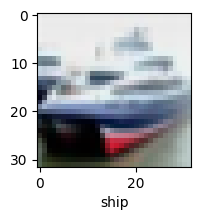

In [43]:
plot_sample(x_test, y_test, 1)

In [44]:
y_pred= cnn.predict(x_test)
y_pred[:5]

313/313 [==============================] - 5s 15ms/step


array([[3.9383220e-03, 1.0702232e-04, 3.5475316e-03, 8.1061751e-01,
        9.5413520e-04, 1.4010149e-01, 2.8113732e-02, 6.2310148e-04,
        1.1725543e-02, 2.7162215e-04],
       [6.0090522e-04, 8.5294135e-03, 7.3985025e-06, 6.5741858e-08,
        4.2314418e-06, 1.8927615e-09, 2.3579352e-09, 2.3816025e-08,
        9.8824304e-01, 2.6148886e-03],
       [1.2618051e-01, 3.7939817e-02, 1.2627276e-02, 1.3920254e-02,
        3.1118318e-03, 2.4234161e-03, 1.6964540e-03, 1.5254443e-02,
        6.8110436e-01, 1.0574161e-01],
       [7.8578150e-01, 1.7771953e-01, 4.5320960e-03, 8.4431740e-05,
        2.2541964e-03, 5.1452785e-06, 2.8015617e-03, 4.7770263e-05,
        2.5009274e-02, 1.7644576e-03],
       [3.3922628e-05, 7.4271753e-05, 2.2148293e-02, 1.3834209e-02,
        6.9454134e-01, 6.9623505e-04, 2.6857093e-01, 9.4076968e-05,
        5.0076164e-06, 1.7507502e-06]], dtype=float32)

In [45]:
y_classes= [np.argmax(element) for element in y_pred]
y_pred_classes[:5]

[8, 8, 8, 8, 4]

In [46]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

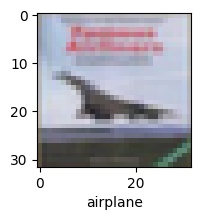

In [51]:
plot_sample(x_test, y_test, 3)

In [52]:
classes[y_classes[3]]

'airplane'

In [53]:
print("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.72      0.72      0.72      1000
           1       0.84      0.80      0.82      1000
           2       0.66      0.53      0.58      1000
           3       0.50      0.48      0.49      1000
           4       0.66      0.60      0.63      1000
           5       0.63      0.58      0.60      1000
           6       0.77      0.77      0.77      1000
           7       0.65      0.81      0.72      1000
           8       0.72      0.83      0.77      1000
           9       0.77      0.80      0.78      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000

